In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
pd.set_option("display.max_rows", 10)
import seaborn as sns
%matplotlib inline  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


## Reading training data

In [95]:
url="http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt"
train_data=pd.read_table(url,names=['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars',
       'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'ncome 45-75.000',
       'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance',
       ' Contribution third party insurane', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies',
       'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies',
       'Contribution social security insurance policies', 'Number of private third party insurance', ' Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances', 'number of private accident insurance policies', ' Number of family accidents insurance policies', ' Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies',
       'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'CARAVAN'])

In [96]:
train_with_target = train_data
train_target = train_data['CARAVAN']
train_data = train_data.drop('CARAVAN',axis=1)
train_data

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,2,0,0,0,1,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


## Reading Testing data

In [4]:
url="http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt"
test_data=pd.read_table(url,names=['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars',
       'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'ncome 45-75.000',
       'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance',
       ' Contribution third party insurane', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies',
       'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies',
       'Contribution social security insurance policies', 'Number of private third party insurance', ' Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances', 'number of private accident insurance policies', ' Number of family accidents insurance policies', ' Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies',
       'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies'])

In [5]:
test_data

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


## Reading Testing Target

In [6]:
url="http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt"
test_target = pd.read_table(url,names=['CARAVAN'])

## Describe data set

In [7]:
train_with_target.describe()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


## Visualize each feature in data set

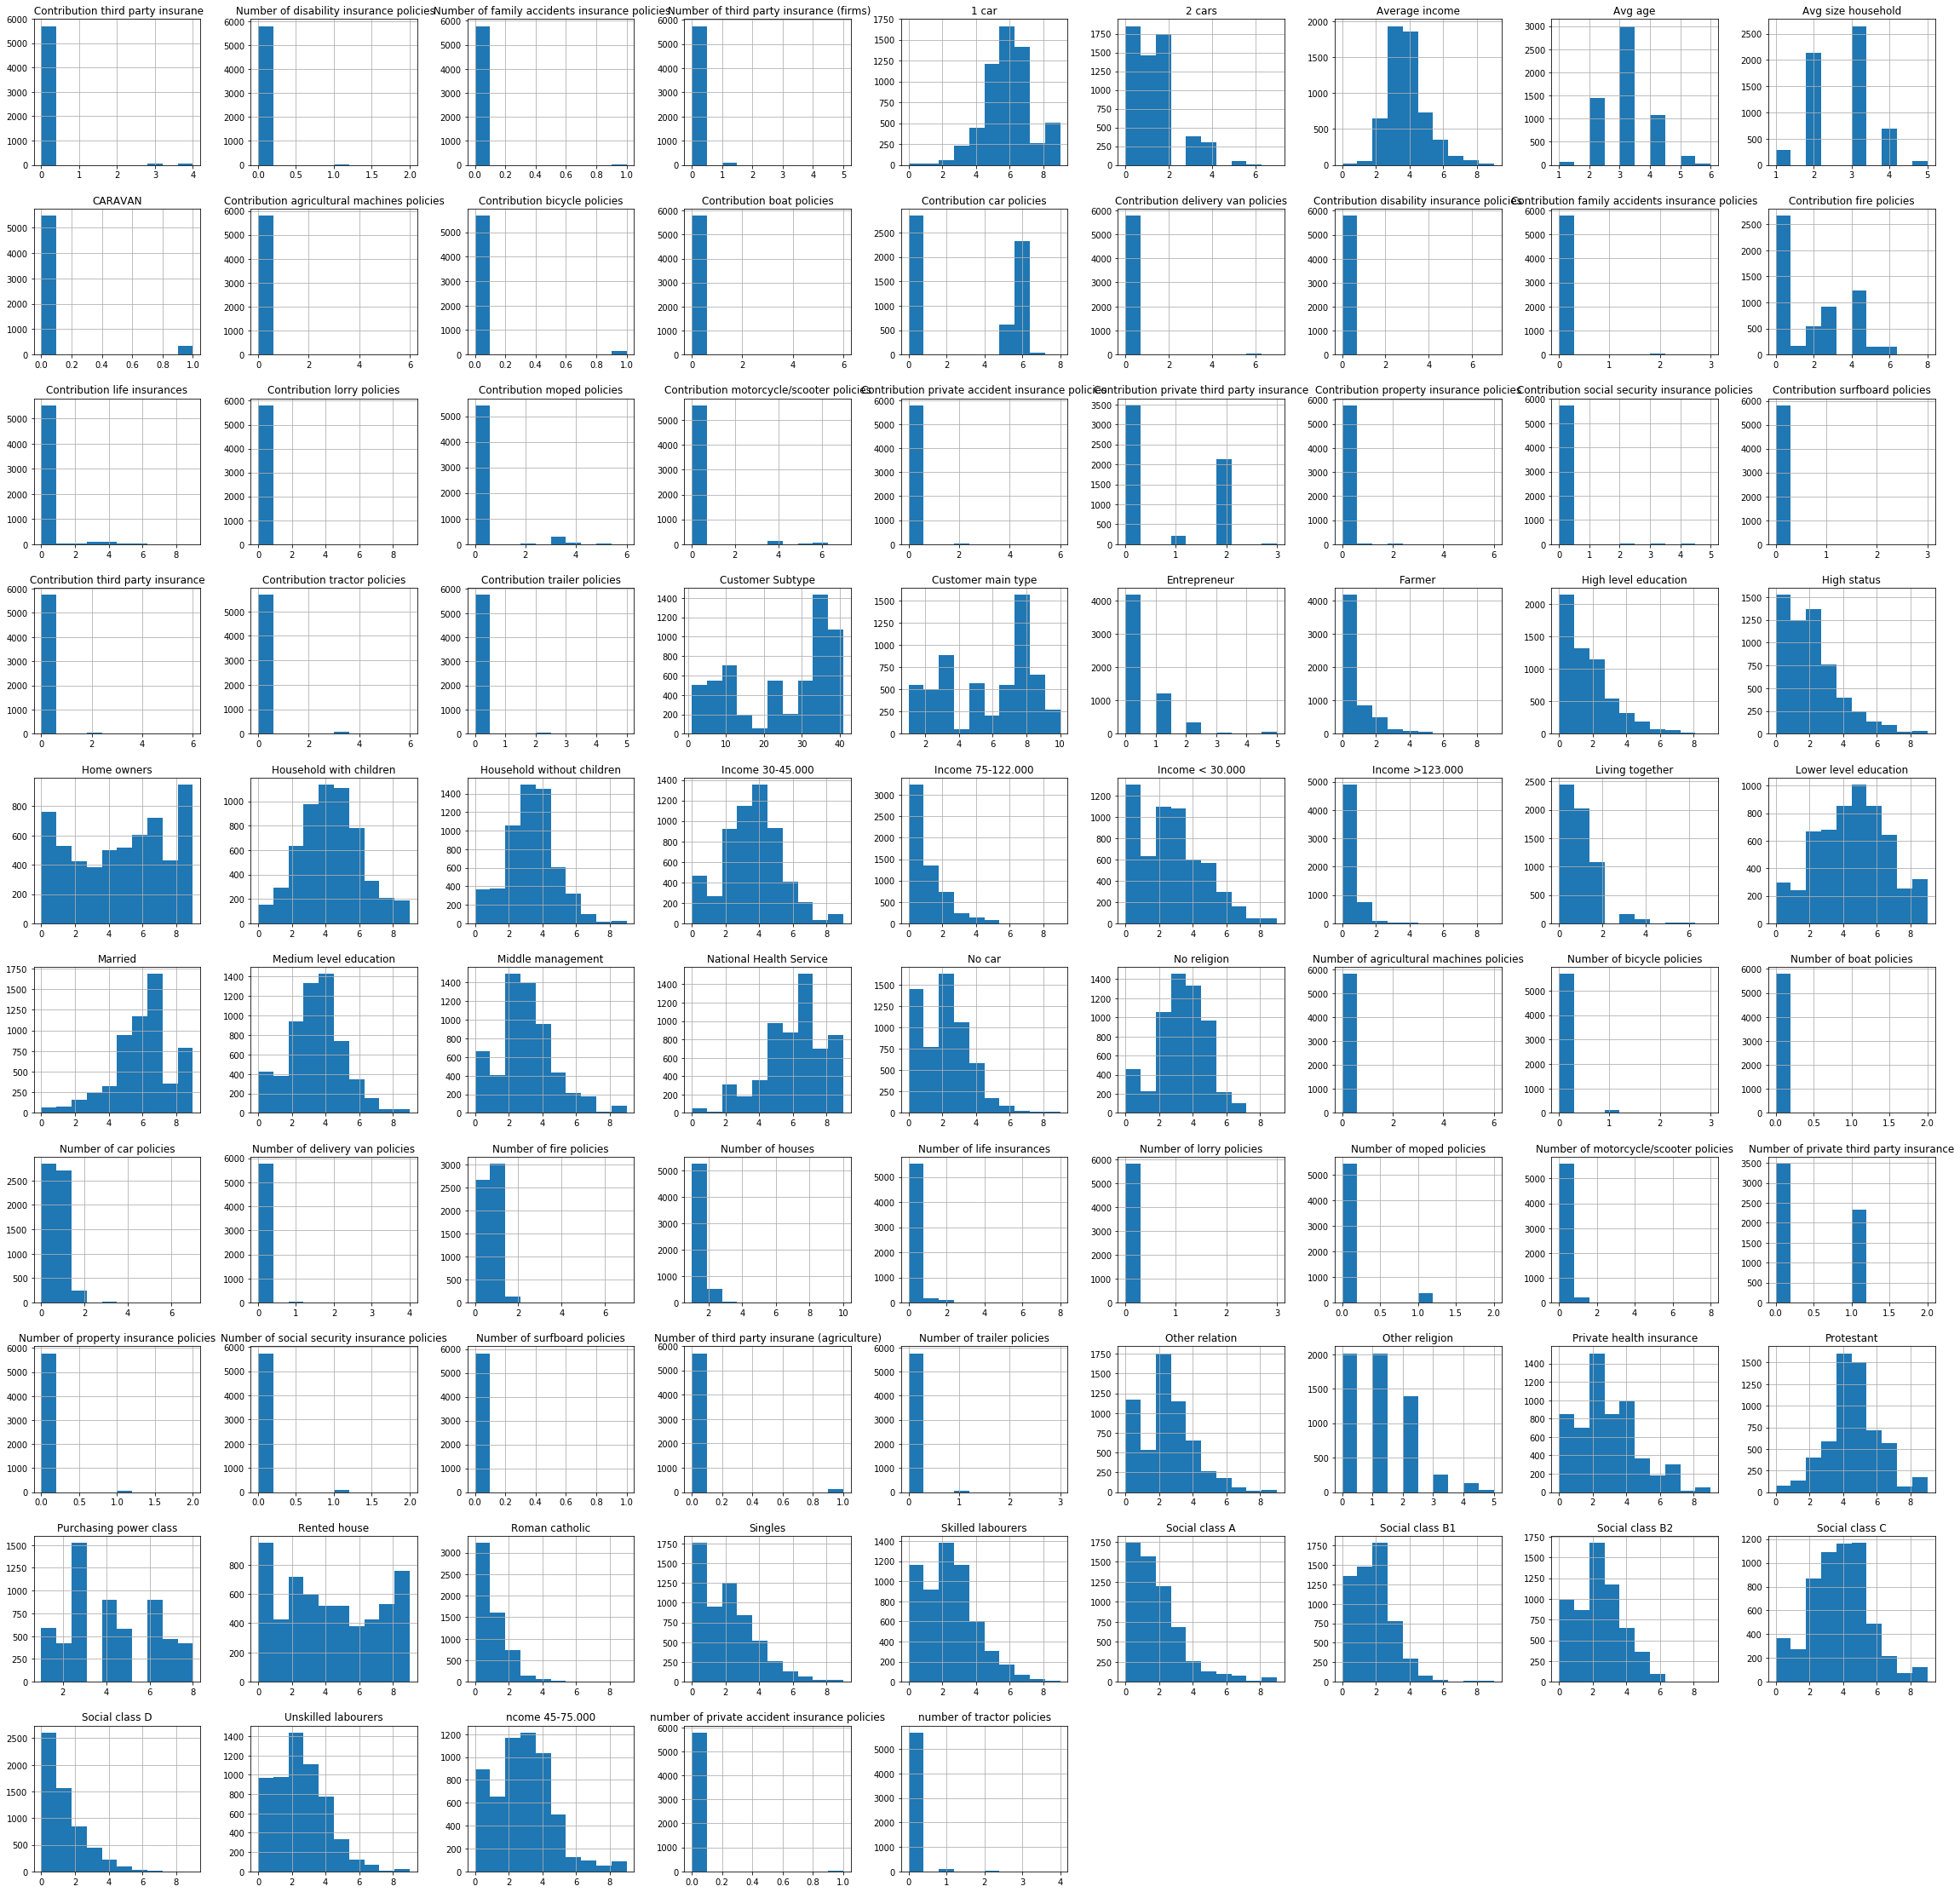

In [8]:
train_with_target.hist(figsize=(40,40))
plt.show()

## Dependancy of Customer subtype on whether customer has or has not insurace policy

Text(0,0.5,'Caravan or not')

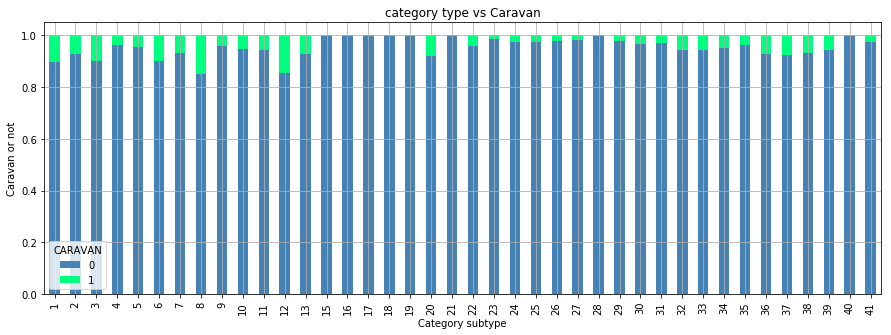

In [9]:
categorysubtype_caravan = pd.crosstab(train_data['Customer Subtype'], train_target)
categorysubtype_caravan_pct = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0)
categorysubtype_caravan_pct.plot(figsize= (15,5), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='category type vs Caravan', grid=True)
plt.xlabel('Category subtype')  # It has 41 different types
plt.ylabel('Caravan or not')

## Dependancy of Age Group on whether customer has or has not insurace policy

Text(0,0.5,'Caravan')

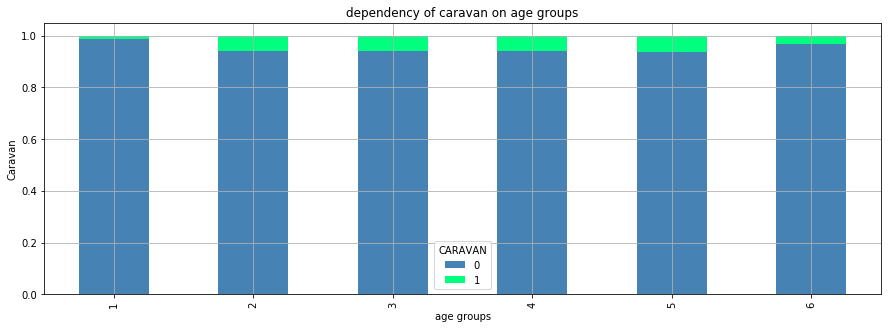

In [10]:
age_caravan = pd.crosstab(train_data['Avg age'], train_target)
age_caravan_pct = age_caravan.div(age_caravan.sum(1).astype(float),axis=0)
age_caravan_pct.plot(figsize=(15,5), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='dependency of caravan on age groups', grid=True)
plt.xlabel('age groups')
plt.ylabel('Caravan')

## Count of Customer main type 

Text(0,0.5,'count')

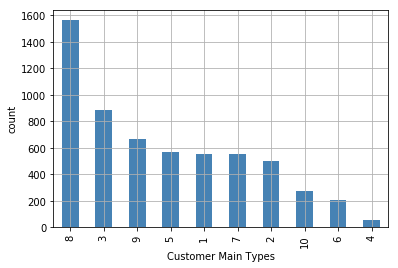

In [11]:
train_data['Customer main type'].value_counts().plot(kind='bar', color='steelblue', grid=True)
plt.xlabel('Customer Main Types')
plt.ylabel('count')

## Training and testing data

In [12]:
X_train = train_data
y_train = train_target
X_test = test_data
y_test = test_target

## Target values

In [13]:
test_target['CARAVAN'].value_counts()

0    3762
1     238
Name: CARAVAN, dtype: int64

## Visualize target 

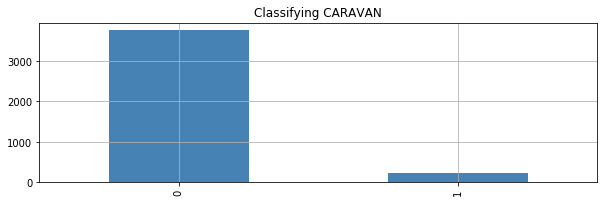

In [14]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
test_target['CARAVAN'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)

# 94% are zeros

In [15]:
# 94% are zeros
max(test_target['CARAVAN'].mean(), 1 - test_target['CARAVAN'].mean())

0.9405

In [16]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

## Applying models without feature selection , engineering etc

Accuracy on training set: 0.94
Accuracy on test set: 0.94
Mean square error  0.06275
[[3745   17]
 [ 234    4]]


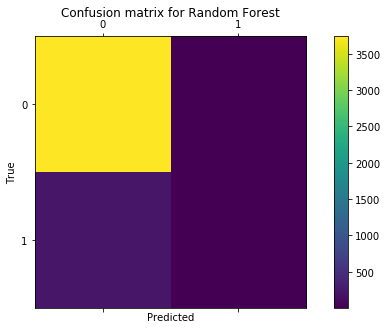

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data,train_target)
predictions=knn.predict(test_data)
print("Accuracy on training set: {:.2f}".format(knn.score(train_data, train_target)))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data, test_target)))
print("Mean square error " , metrics.mean_squared_error(test_target, predictions))

class_names = np.unique(np.array(y_test))
confusion_matrices = [
    ( "KNeighborsClassifier", confusion_matrix(test_target, predictions))
]

# calling below function
draw_confusion_matrices(confusion_matrices,class_names)

## Cross Validation

In [18]:
scores1 = cross_val_score(knn, X_train ,y_train)
print("Accuracy on training after cross validation: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
scores2 = cross_val_score(knn, X_test , y_test)
print("Accuracy on testing after cross validation: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Accuracy on training after cross validation: 0.94 (+/- 0.00)


C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Accuracy on testing after cross validation: 0.94 (+/- 0.00)


## Correlation matrix

In [19]:
corr_matrix = train_with_target.corr().style.background_gradient()
corr_matrix

## Features sorted according to correlation with target

In [20]:
corr_matrix = train_with_target.corr()
corr_matrix['CARAVAN'].sort_values(ascending=False)

CARAVAN                                       1.000000
Contribution car policies                     0.150910
Number of car policies                        0.144210
Number of boat policies                       0.105700
Contribution private third party insurance    0.096463
                                                ...   
Customer Subtype                             -0.069385
No car                                       -0.076501
Rented house                                 -0.079143
Income < 30.000                              -0.079765
Lower level education                        -0.090561
Name: CARAVAN, Length: 86, dtype: float64

In [21]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [22]:
correlation(train_with_target, 0.4)

,Customer Subtype,Number of houses,Avg size household,Avg age,Roman catholic,Protestant,Other religion,No religion,Living together,Other relation,...,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,CARAVAN
0,33,1,3,2,0,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
1,37,1,2,2,1,4,1,4,2,2,...,0,0,0,0,0,0,0,0,0,0
2,37,1,2,2,0,4,2,4,2,4,...,0,0,0,0,0,0,0,0,0,0
3,9,1,3,3,2,3,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
4,40,1,4,2,1,4,1,4,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,0,6,1,2,2,6,...,3,0,0,0,0,0,0,0,0,0
5818,35,1,4,4,1,4,1,4,0,3,...,0,0,0,0,0,0,0,0,0,0
5819,33,1,3,4,0,6,0,3,1,4,...,0,0,0,0,0,0,0,0,0,1
5820,34,1,3,2,0,7,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
selected_features = correlation(train_with_target, 0.4) 
selected_features.shape

(5822, 44)

In [24]:
selected_features.loc[:,selected_features.columns != 'CARAVAN']

,Customer Subtype,Number of houses,Avg size household,Avg age,Roman catholic,Protestant,Other religion,No religion,Living together,Other relation,...,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies
0,33,1,3,2,0,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
1,37,1,2,2,1,4,1,4,2,2,...,0,0,0,0,0,0,0,0,0,0
2,37,1,2,2,0,4,2,4,2,4,...,0,0,0,0,0,0,0,0,0,0
3,9,1,3,3,2,3,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
4,40,1,4,2,1,4,1,4,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,0,6,1,2,2,6,...,0,3,0,0,0,0,0,0,0,0
5818,35,1,4,4,1,4,1,4,0,3,...,3,0,0,0,0,0,0,0,0,0
5819,33,1,3,4,0,6,0,3,1,4,...,0,0,0,0,0,0,0,0,0,0
5820,34,1,3,2,0,7,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(selected_features.loc[:,selected_features.columns != 'CARAVAN']  ,selected_features.loc[:,selected_features.columns == 'CARAVAN'])
predictions=knn.predict(test_data.loc[:,selected_features.columns!='CARAVAN'])
print("Accuracy on training set: {:.3f}".format(knn.score(selected_features.loc[:,selected_features.columns != 'CARAVAN'], selected_features.loc[:,selected_features.columns == 'CARAVAN'])))
print("Accuracy on test set: {:.3f}".format(knn.score(test_data.loc[:,selected_features.columns!='CARAVAN'], test_data.loc[:,selected_features.columns=='CARAVAN'])))

print("Mean square error " , metrics.mean_squared_error(test_target, predictions))
print(metrics.confusion_matrix(test_target, predictions))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 0.941
Accuracy on test set: 0.605
Mean square error  0.0595
[[3762    0]
 [ 238    0]]


In [26]:
scores1 = cross_val_score(knn, selected_features.loc[:,selected_features.columns != 'CARAVAN'] ,selected_features.loc[:,selected_features.columns == 'CARAVAN'])
print("Accuracy on training after cross validation: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
scores2 = cross_val_score(knn, test_data.loc[:,selected_features.columns!='CARAVAN'] , test_data.loc[:,selected_features.columns=='CARAVAN'])
print("Accuracy on testing after cross validation: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Accuracy on training after cross validation: 0.93 (+/- 0.01)


C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Accuracy on testing after cross validation: 0.55 (+/- 0.00)


C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


## 1- Automatic Feature Selection

In [27]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
X_test_selected = select.transform(X_test)


X_train.shape: (5822, 85)
X_train_selected.shape: (5822, 42)


## KNN 

In [56]:
from sklearn.metrics import accuracy_score

print("Knn")
knn.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(knn.score(X_test, y_test)))
knn.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(knn.score(X_test_selected, y_test)))
y_pred=knn.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_train, y_pred))  
print(classification_report(y_train, y_pred))  


Knn
Score with all features: 0.942
Score with only selected features: 0.942
[[2732    0]
 [ 179    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2732
          1       0.00      0.00      0.00       179

avg / total       0.88      0.94      0.91      2911

0.9385091034008932


C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression:")
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

y_pred=lr.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_train, y_pred))  
print(classification_report(y_train, y_pred))  


Logistic Regression:
Score with all features: 0.938
Score with only selected features: 0.940
[[2721   11]
 [ 178    1]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2732
          1       0.08      0.01      0.01       179

avg / total       0.89      0.94      0.91      2911



## Decision tree


In [58]:
dt = DecisionTreeClassifier(max_depth=10,random_state=0)
dt.fit(X_train, y_train)
print("Decision tree")
print("Accuracy on test set without select: {:.3f}".format(dt.score(X_test, y_test)))
dt.fit(X_train_selected, y_train)
print("Accuracy on test set with select: {:.3f}".format(dt.score(X_test_selected, y_test)))

y_pred=dt.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_train, y_pred))  
print(classification_report(y_train, y_pred))

Decision tree
Accuracy on test set without select: 0.922
Accuracy on test set with select: 0.926
[[2659   73]
 [ 175    4]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      2732
          1       0.05      0.02      0.03       179

avg / total       0.88      0.91      0.90      2911



## Random forest

In [59]:
#random forest
forest = RandomForestClassifier(n_estimators=25, random_state=0)
forest.fit(X_train, y_train)
print("Random forest")
print("Accuracy on test set without select: {:.3f}".format(forest.score(X_test, y_test)))
forest.fit(X_train_selected, y_train)
print("Accuracy on test set with select: {:.3f}".format(forest.score(X_test_selected, y_test)))

y_pred=forest.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_train, y_pred))  
print(classification_report(y_train, y_pred))

Random forest
Accuracy on test set without select: 0.932
Accuracy on test set with select: 0.929
[[2670   62]
 [ 176    3]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      2732
          1       0.05      0.02      0.02       179

avg / total       0.88      0.92      0.90      2911



## 2 - Select from model


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
X_test_l1 = select.transform(X_test)



X_train.shape: (5822, 85)
X_train_l1.shape: (5822, 43)


## Logistic Regression

In [33]:
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Logistic Regression Test score: {:.3f}".format(score))

Logistic Regression Test score: 0.941


## knn

In [34]:
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("KNN Test score: {:.3f}".format(knn))

KNN Test score: 0.941


## Decision Tree

In [35]:
dt = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Decision Tree Test score: {:.3f}".format(knn))

Decision Tree Test score: 0.941


## Random forest

In [36]:
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Random Forest Test score: {:.3f}".format(forest))

Random Forest Test score: 0.930


## 3- Unvariant

In [37]:
#univariate
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(train_data), 0))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([train_data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, train_target, random_state=0, test_size=.5)


select = SelectPercentile(percentile=47)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
# transform test data
X_test_selected = select.transform(X_test)

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)


print("Logistic Regression:")
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

#decision tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(X_train, y_train)


print("Decision tree")
print("Accuracy on test set without select: {:.3f}".format(dt.score(X_test, y_test)))
dt.fit(X_train_selected, y_train)
print("Accuracy on test set with select: {:.3f}".format(dt.score(X_test_selected, y_test)))

#knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print("K nearest neighbours")
print("Accuracy on test set without select: {:.3f}".format(knn.score(X_test, y_test)))
knn.fit(X_train_selected, y_train)
print("Accuracy on test set with select: {:.3f}".format(knn.score(X_test_selected, y_test)))

## random forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Random forest")
print("Accuracy on test set without select: {:.3f}".format(forest.score(X_test, y_test)))
forest.fit(X_train_selected, y_train)
print("Accuracy on test set with select: {:.3f}".format(forest.score(X_test_selected, y_test)))

X_train.shape: (2911, 85)
X_train_selected.shape: (2911, 40)
Logistic Regression:
Score with all features: 0.938
Score with only selected features: 0.940
Decision tree
Accuracy on test set without select: 0.922
Accuracy on test set with select: 0.926
K nearest neighbours
Accuracy on test set without select: 0.942
Accuracy on test set with select: 0.942
Random forest
Accuracy on test set without select: 0.929
Accuracy on test set with select: 0.929


## 4 - Iterative feature selection

In [38]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=25)

select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

#Logistic Regression
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Logistic Regression Test score without select: {:.3f}".format(score))
print("Logistic Regression Test score with selection: {:.3f}".format(select.score(X_test, y_test)))

print("\n")
#knn
score = KNeighborsClassifier(n_neighbors=30).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Knn Test set accuracy without select: {:.2f}".format(score))
print("Knn Test set accuracy with selection: {:.2f}".format(select.score(X_test, y_test)))
print("\n")
#decision tree
score = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Decision Tree Accuracy on test set without select: {:.3f}".format(score))
print("Decision Tree Accuracy on test selection: {:.3f}".format(select.score(X_test, y_test)))
print("\n")
#random forest
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Random Forest Accuracy on test set without select: {:.3f}".format(score))
print("Random Forest Accuracy on test selection: {:.3f}".format(select.score(X_test, y_test)))

Logistic Regression Test score without select: 0.942
Logistic Regression Test score with selection: 0.928


Knn Test set accuracy without select: 0.94
Knn Test set accuracy with selection: 0.93


Decision Tree Accuracy on test set without select: 0.913
Decision Tree Accuracy on test selection: 0.928


Random Forest Accuracy on test set without select: 0.913
Random Forest Accuracy on test selection: 0.928


## 5 - Select K best features method

In [39]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)
Y_new = SelectKBest(chi2, k=10).fit_transform(X_test, y_test)

## Logistic Regression , Decision tree , random forest

In [40]:
X_train_rfe = X_new
X_test_rfe = Y_new
#Logistic Regression
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Logistic Regression Test score without select: {:.3f}".format(score))
print("Logistic Regression Test score with selection: {:.3f}".format(select.score(X_test, y_test)))
print("\n")

#decision tree
score = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Decision Tree Accuracy on test set without select: {:.3f}".format(score))
print("Decision Tree Accuracy on test selection: {:.3f}".format(select.score(X_test, y_test)))
print("\n")
#random forest
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Random Forest Accuracy on test set without select: {:.3f}".format(score))
print("Random Forest Accuracy on test selection: {:.3f}".format(select.score(X_test, y_test)))

Logistic Regression Test score without select: 0.696
Logistic Regression Test score with selection: 0.928


Decision Tree Accuracy on test set without select: 0.933
Decision Tree Accuracy on test selection: 0.928


Random Forest Accuracy on test set without select: 0.933
Random Forest Accuracy on test selection: 0.928


## Relationship between K and accuracy

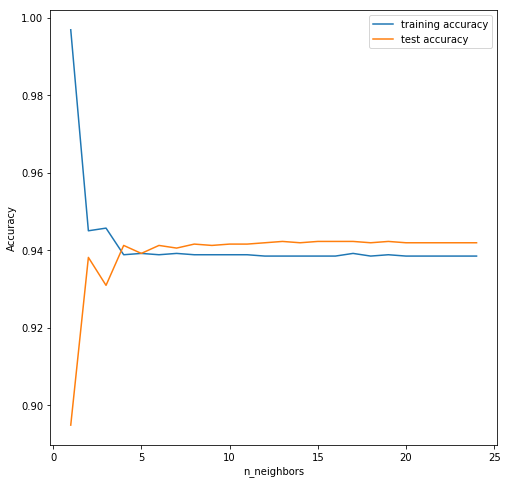

In [41]:

fig, axes = plt.subplots(figsize=(8, 8))
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
nb = range(1, 25)

for n_neighbors in nb:
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(nb, training_accuracy, label="training accuracy")
plt.plot(nb, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()  

## Feature Importance

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier()
importances = clf1.feature_importances_[:85]
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = train_data.columns

for f in range(85):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

plt.figure(figsize=(50,50))
plt.title("Feature importances")
plt.bar(range(85), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(85), indices)
plt.xlim([-1, 85])
plt.show()

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [61]:
train_data.loc[:,train_data.columns[0:10]]

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married
0,33,1,3,2,8,0,5,1,3,7
1,37,1,2,2,8,1,4,1,4,6
2,37,1,2,2,8,0,4,2,4,3
3,9,1,3,3,3,2,3,2,4,5
4,40,1,4,2,10,1,4,1,4,7
...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1
5818,35,1,4,4,8,1,4,1,4,6
5819,33,1,3,4,8,0,6,0,3,5
5820,34,1,3,2,8,0,7,0,2,7


## Knn with feature importance

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(selected_features.loc[:,selected_features.columns != 'CARAVAN']  ,selected_features.loc[:,selected_features.columns == 'CARAVAN'])
predictions=knn.predict(test_data.loc[:,selected_features.columns!='CARAVAN'])
print("Accuracy on training set: {:.2f}".format(knn.score(selected_features.loc[:,selected_features.columns != 'CARAVAN'], selected_features.loc[:,selected_features.columns == 'CARAVAN'])))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data.loc[:,selected_features.columns!='CARAVAN'], test_data.loc[:,selected_features.columns=='CARAVAN'])))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 0.94
Accuracy on test set: 0.61


In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data.loc[:,train_data.columns[0:10]]  ,selected_features.loc[:,selected_features.columns == 'CARAVAN'])
predictions=knn.predict(test_data.loc[:,test_data.columns[0:10]])
print("Accuracy on training set: {:.2f}".format(knn.score(train_data.loc[:,train_data.columns[0:10]], selected_features.loc[:,selected_features.columns == 'CARAVAN'])))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data.loc[:,test_data.columns[0:10]], test_data.loc[:,selected_features.columns=='CARAVAN'])))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 0.94
Accuracy on test set: 0.60


In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data,train_target)
predictions=knn.predict(test_data)
print("Accuracy on training set: {:.2f}".format(knn.score(train_data, train_target)))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data, test_target)))
print("Mean square error " , metrics.mean_squared_error(test_target, predictions))
print("Precision " , metrics.precision_score(test_target, predictions))


Accuracy on training set: 0.94
Accuracy on test set: 0.94
Mean square error  0.06275
Precision  0.19047619047619047


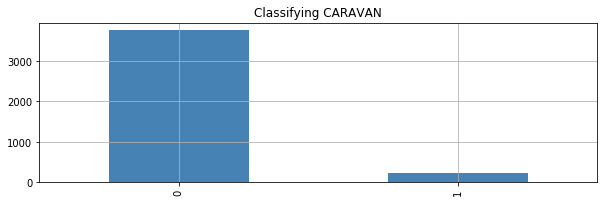

In [65]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
test_target['CARAVAN'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)

In [83]:
train_with_target.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

## Random under-sampling

In [98]:
# Class count
count_class_0, count_class_1 = train_with_target.CARAVAN.value_counts()

# Divide by class
df_class_0 = train_with_target[train_with_target['CARAVAN'] == 0]
df_class_1 = train_with_target[train_with_target['CARAVAN'] == 1]


Random under-sampling:
1    348
0    348
Name: CARAVAN, dtype: int64


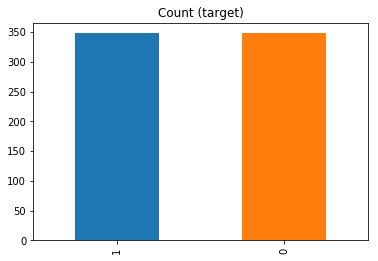

In [99]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.CARAVAN.value_counts())

df_test_under.CARAVAN.value_counts().plot(kind='bar', title='Count (target)');


In [100]:
df_test_under.shape

(696, 86)

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_test_under.loc[:,df_test_under.columns != 'CARAVAN']  ,df_test_under.loc[:,df_test_under.columns == 'CARAVAN'])
predictions=knn.predict(test_data.loc[:,df_test_under.columns!='CARAVAN'])
print("Accuracy on training set: {:.2f}".format(knn.score(df_test_under.loc[:,df_test_under.columns != 'CARAVAN'], df_test_under.loc[:,df_test_under.columns == 'CARAVAN'])))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data, test_target)))
print("Mean square error " , metrics.mean_squared_error(test_target, predictions))
print(metrics.confusion_matrix(test_target, predictions))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 0.75
Accuracy on test set: 0.54
Mean square error  0.45925
[[1996 1766]
 [  71  167]]


## Random over-sampling

Random over-sampling:
1    5474
0    5474
Name: CARAVAN, dtype: int64


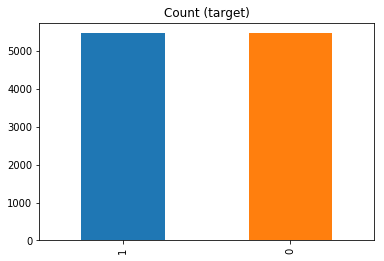

In [104]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.CARAVAN.value_counts())

df_test_over.CARAVAN.value_counts().plot(kind='bar', title='Count (target)');

In [106]:
df_test_over.shape

(10948, 86)

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_test_over.loc[:,df_test_over.columns != 'CARAVAN']  ,df_test_over.loc[:,df_test_over.columns == 'CARAVAN'])
predictions=knn.predict(test_data.loc[:,df_test_over.columns!='CARAVAN'])
print("Accuracy on training set: {:.2f}".format(knn.score(df_test_over.loc[:,df_test_over.columns != 'CARAVAN'], df_test_over.loc[:,df_test_over.columns == 'CARAVAN'])))
print("Accuracy on test set: {:.2f}".format(knn.score(test_data, test_target)))

print(metrics.confusion_matrix(test_target, predictions))

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 0.94
Accuracy on test set: 0.82
[[3208  554]
 [ 163   75]]
